In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from convokit import Corpus, download
from convokit import HyperConvo
import numpy as np
import pickle

In [4]:
from tensorly.decomposition import parafac

In [5]:
# with open('/home/caleb/Cornell-Conversational-Analysis-Toolkit/convokit/tensors/data/hypergraph_tensor.p', 'rb') as f:

with open('convokit/tensors/data/hypergraph_tensor.p', 'rb') as f:
    tensor = pickle.load(f)

In [6]:
# with open('hypergraph_tensor.p', 'rb') as f:
#     tensor = pickle.load(f)

In [7]:
tensor.shape

(9, 10000, 164)

In [8]:
rank_to_factors = dict()

In [9]:
start_rank = 9
end_rank = 9 + 1

In [10]:
for rank in range(start_rank, end_rank):
    print(rank)
    rank_to_factors[rank] = parafac(tensor, rank=rank)[1]

9


In [11]:
os.chdir('convokit/tensors')

In [12]:
import utils

In [13]:
utils

<module 'utils' from '/Users/calebchiam/Documents/GitHub/Cornell-Conversational-Analysis-Toolkit/convokit/tensors/utils.py'>

In [14]:
rank_to_reconstructed = dict()
for rank, factors in rank_to_factors.items():
    print(rank)
    rank_to_reconstructed[rank] = utils.reconstruct(factors)

9


In [15]:
rank_to_error = dict()
for rank, M in rank_to_reconstructed.items():
    print(rank)
    rank_to_error[rank] = np.linalg.norm(tensor - M)

9


In [16]:
rank_to_error

{9: 1762.3748566646566}

In [17]:
import matplotlib.pyplot as plt

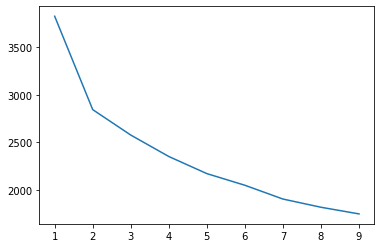

In [24]:
plt.plot(list(rank_to_error.keys()), list(rank_to_error.values()))

We'll go with 9 components for now.

In [26]:
os.listdir()

['__init__.py', 'data', 'demo', 'utils.py', '__pycache__']

In [18]:
with open('data/rank_to_factors.p', 'wb') as f:
    pickle.dump(rank_to_factors, f)

In [ ]:
{1: 3819.265576516634,
 2: 2844.773417177397,
 3: 2576.5195453161737,
 4: 2357.5843602190625,
 5: 2179.368911193231,
 6: 2053.847295539327,
 7: 1903.4653298649869}

## Testing invariance to shuffling

In [20]:
tensor.shape

(9, 10000, 164)

Shuffle the time dimension.

In [22]:
tensor_time_shuffled = tensor.copy()
np.random.shuffle(tensor_time_shuffled)

In [25]:
factors = parafac(tensor_time_shuffled, rank=rank)[1]

In [26]:
reconstructed = utils.reconstruct(factors)
error = np.linalg.norm(tensor_time_shuffled - reconstructed)

In [27]:
error # same error as before!

1762.374856664664

In [28]:
with open('data/rank_to_factors_time_shuffled.p', 'wb') as f:
    pickle.dump({9: factors}, f)

Shuffle the discussion thread order.

In [61]:
tensor_thread_shuffled = tensor.copy()

In [62]:
shuffle_idx = list(range(10000))

In [63]:
np.random.shuffle(shuffle_idx)

In [65]:
for i in range(tensor_thread_shuffled.shape[0]):
    tensor_thread_shuffled[i] = tensor_thread_shuffled[i][shuffle_idx]

In [67]:
factors = parafac(tensor_thread_shuffled, rank=rank)[1]

In [70]:
reconstructed = utils.reconstruct(factors)
error = np.linalg.norm(tensor_thread_shuffled - reconstructed)

In [71]:
error # same error as before!

1762.3748566646532

In [73]:
with open('data/rank_to_factors_thread_shuffled.p', 'wb') as f:
    pickle.dump({9: factors}, f)